# [Project 1] 코로나 데이터 분석

---

## 프로젝트 목표
- 서울시 코로나 19 확진자 현황 데이터를 분석하여 유의미한 정보 도출
- 탐색적 데이터 분석을 수행하기 위한 데이터 정제, 특성 엔지니어링, 시각화 방법 학습

---

## 프로젝트 목차
1. **데이터 읽기:** 코로나 데이터를 불러오고 Dateframe 구조를 확인<br>
    1.1. 데이터 불러오기<br>
<br>
2. **데이터 정제:** 비어있는 데이터 또는 쓸모없는 데이터를 삭제<br>
    2.1. 비어있는 column 지우기<br>
<br>
3. **데이터 시각화:** 각 변수 별로 추가적인 정제 또는 feature engineering 과정을 거치고 시각화를 통하여 데이터의 특성 파악<br>
    3.1. 확진일 데이터 전처리하기<br>
    3.2. 월별 확진자 수 출력<br>
    3.3. 8월 일별 확진자 수 출력<br>
    3.4. 지역별 확진자 수 출력<br>
    3.5. 8월달 지역별 확진자 수 출력<br>
    3.6. 월별 관악구 확진자 수 출력<br>
    3.7. 서울 지역의 확진자를 지도에 출력<br>

---

## 데이터 출처
-  https://www.data.go.kr/tcs/dss/selectFileDataDetailView.do?publicDataPk=15063273

---

## 프로젝트 개요
2020년 초에 발생한 코로나19 바이러스는 세계적으로 대유행하였고 이에 대한 많은 분석이 이루어지고있습니다. 유행 초기엔 이를 분석할 데이터가 충분하지 않았지만 6개월 이상 지난 지금은 다양한 데이터 기관에서 코로나 관련 데이터를 공공으로 제공하고 있습니다.

이번 프로젝트엣서는 국내 공공데이터 포털에서 제공하는 '서울시 코로나19 확진자 현황'데이터를 바탕으로 탐색적 데이터 분석을 수행해보겠습니다. 국내 데이터 중 확진자 비율이 제일 높고 사람이 제일 많은 서울시의 데이터를 선정하였으며, 이를 바탕으로 코로나19의 확진 추이 및 환자 특성에 대해서 데이터를 바탕으로 알아봅시다.

---

## 1. 데이터 읽기
필요한 패키지 설치 및 `import`한 후 `pandas`를 사용하여 데이터를 읽고 어떠한 데이터가 저장되어 있는지 확인합니다.

---

### 1.1. 데이터 불러오기

In [9]:
import numpy as np # 배열을 사용하기위한 모듈
import pandas as pd # 인덱스와 values를 같이 저장, 데이터 읽어오기위해 사용
import matplotlib.pyplot as plt # 데이터를 그래프로 나타내기위한 모듈
import seaborn as sns # 데이터 시각화 모듈
print("...")  # 실행완료 확인용

...


In [10]:
# pd.read_csv를 통하여 dataframe 형태로 읽어옵니다.
corona_all=pd.read_csv("./data/서울시 코로나19 확진자 현황.csv")  
# 오류 : 파일위치변경해보기
print("...")  # 실행완료 확인용

...


In [11]:
# 불러온 자료에서 상위5개의 데이터를 출력합니다.
corona_all.head()

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,5748,10.21.,25530,NaN,NaN,양천구,NaN,감염경로 조사중,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
1,5747,10.21.,25528,NaN,NaN,강동구,NaN,강남서초 지인모임,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
2,5746,10.21.,25525,NaN,NaN,강남구,NaN,기타 확진자 접촉,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
3,5745,10.21.,25517,NaN,NaN,관악구,NaN,감염경로 조사중,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
4,5744,10.21.,25504,NaN,NaN,관악구,NaN,기타 확진자 접촉,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y


In [12]:
# dataframe 정보를 요약하여 출력합니다.
corona_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5748 entries, 0 to 5747
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연번      5748 non-null   int64  
 1   확진일     5748 non-null   object 
 2   환자번호    5748 non-null   int64  
 3   국적      0 non-null      float64
 4   환자정보    0 non-null      float64
 5   지역      5748 non-null   object 
 6   여행력     459 non-null    object 
 7   접촉력     5748 non-null   object 
 8   조치사항    0 non-null      float64
 9   상태      5357 non-null   object 
 10  이동경로    5520 non-null   object 
 11  등록일     5748 non-null   object 
 12  수정일     5748 non-null   object 
 13  노출여부    5748 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 628.8+ KB


---

## 2. 데이터 정제
데이터를 읽고 확인한 후 결측값(missing data), 이상치(outlier)를 처리하는 데이터 정제과정을 수행해 봅시다.

### 2.1. 비어있는 column 지우기
`corona_all.info()` 코드를 통하여 `국적`,`환자정보`,`조치사항` 에 해당하는 데이터가 존재하지 않는것을 알 수 있습니다. 
(0 non-null : 비어있지않은 데이터가 없다. 즉, 빈 데이터 이다.)

`dataframe.drop()`을 사용하여 불필요한 `국적`,`환자정보`,`조치사항` 의 column데이터를 삭제하고 이 dataframe을 `corona_del_col`에 저장해 봅시다.

In [13]:
# drop 함수를 사용하여 국적, 환자정보, 조치사항 column 데이터를 삭제해 봅시다.
# 데이터를 지울때 변수를 새로선언해서 원본 대신 복사본을 사용하는 것이 좋습니다.
corona_del_col=corona_all.drop(columns=['국적','환자정보','조치사항'])

In [14]:
# 정제 처리된 dataframe 정보를 출력합니다.
corona_del_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5748 entries, 0 to 5747
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연번      5748 non-null   int64 
 1   확진일     5748 non-null   object
 2   환자번호    5748 non-null   int64 
 3   지역      5748 non-null   object
 4   여행력     459 non-null    object
 5   접촉력     5748 non-null   object
 6   상태      5357 non-null   object
 7   이동경로    5520 non-null   object
 8   등록일     5748 non-null   object
 9   수정일     5748 non-null   object
 10  노출여부    5748 non-null   object
dtypes: int64(2), object(9)
memory usage: 494.1+ KB


---

## 3. 데이터 시각화
데이터 정제를 완료한 `corona_del_col` 데이터를 바탕으로 각 column의 변수별로 어떠한 데이터 분포를 하고 있는지 시각화를 통하여 알아봅시다.

### 3.1. 확진일 데이터 전처리하기
`확진일` 데이터를 간단히 출력해보면 `월,일` 형태의 날짜 형식임을 알 수 있습니다.
월별, 일별 분석을 위해서는 문자열 형식의 데이터를 나누어 숫자형 데이터로 변환해야합니다.

In [15]:
# '확진일' 데이터 출력해보기
# 5748개의 월.일 데이터가 출력되는 것을 확인할 수 있습니다.
corona_del_col['확진일']

0       10.21.
1       10.21.
2       10.21.
3       10.21.
4       10.21.
         ...  
5743     1.31.
5744     1.30.
5745     1.30.
5746     1.30.
5747     1.24.
Name: 확진일, Length: 5748, dtype: object

#### `확진일` 데이터를 `month`,`day` 데이터로 나누기
`확진일` 에 저장된 문자열 데이터를 나누어 `month`,`day` column에 int64형태로 저장해 봅시다.

In [16]:
# dataframe에 추가하기전, 임시로 데이터를 저장해 둘 list를 선언합니다.
month=[]
day=[]

for data in corona_del_col['확진일']:
    # split 함수를 사용하여 월,일 을 나누어 list에 저장합니다.
    # split : 지정한 문자를 기준으로 데이터를 나누겠다.
    month.append(data.split('.')[0])  # .을 기준으로 0번째에 있는 값을 month배열에 추가하겠다.
    day.append(data.split('.')[1])    # .을 기준으로 1번째에 있는 값을 day배열에 추가하겠다.

In [17]:
# corona_del_col에 'month','day' column을 생성하며 동시에 list에 임시 저장된 데이터를 저장합니다.
corona_del_col['month']=month
corona_del_col['day']=day
# astype를 통하여 datatype을 int64로 바꿔줍니다.
corona_del_col['month'].astype('int64')
corona_del_col['day'].astype('int64')

0       21
1       21
2       21
3       21
4       21
        ..
5743    31
5744    30
5745    30
5746    30
5747    24
Name: day, Length: 5748, dtype: int64

### 3.2. 월별 확진자 수 출력
나누어진 `month`의 데이터를 바탕으로 달별 확진자 수를 막대그래프로 출력해 보겠습니다.

In [21]:
# 그래프에서 x축의 순서를 정리하기 위하여 order list를 생성합니다.
# 가지고있는 자료가 10월까지이기때문에 10월까지의 order를 만들겠습니다.
order_month=[]  # 빈 list 만들기
for i in range(1,11):  # 1이상 11미만까지 반복하기
    order_month.append(str(i))  # i를 문자열로 order list에 추가하기
order_month # order list 출력하기

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

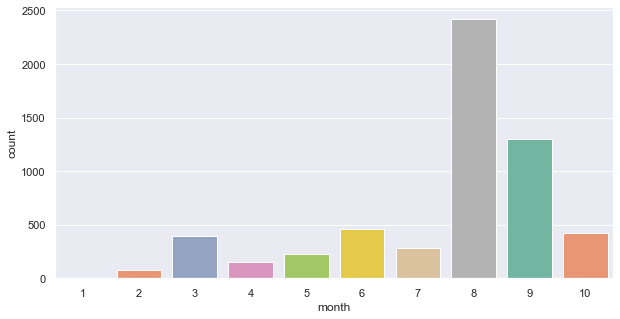

In [22]:
# 그래프의 사이즈 지정하기
plt.figure(figsize=(10,5))  # 가로 10, 세로 5

# seaborn의 countplot 함수를 사용하여 출력합니다.
sns.set(style="darkgrid")  # set style : 그림의 전반적인 모양을 스타일링
ax=sns.countplot(x="month",data=corona_del_col, palette="Set2",order=order_month)
# countplot : 데이터 개수를 세고 그래프 그리는 것을 한번에 즉, 원본데이터의 개수를 가지고 바로 그래프를 그려주는 함수
# palette : 그래프 색
# order : 데이터의 순서

<AxesSubplot:>

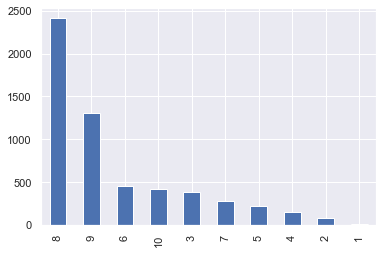

In [23]:
# series의 plot 함수를 사용한 출력방법도 있습니다.
# 값이 큰 값부터 내림차순으로 정리해 보겠습니다.
# value_counts : 데이터의 개수를 세서 내림차순으로 정리하는 함수
corona_del_col['month'].value_counts().plot(kind='bar')  # 그래프의 모양은 bar

In [24]:
# 숫자로 출력하기
corona_del_col['month'].value_counts()

8     2416
9     1304
6      460
10     425
3      391
7      281
5      228
4      156
2       80
1        7
Name: month, dtype: int64

### 3.8. 8월달 일별 확진자 수 출력
월별 확진자 수를 출력해보면 알 수 있듯이 8월에 확진자 수가 가장 많았습니다.
이번엔 8월동안 확진자 수가 어떻게 늘었는지 일별 확진자 수를 막대그래프로 출력해 보겠습니다.

In [25]:
# 그래프에서 x축의 순서를 정리하기 위하여 order list를 생성합니다.
# 8월은 31일까지 있기 때문에 31까지 만들어줍니다.
order_day=[]
for i in range(1,32):
    order_day.append(str(i))
order_day

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31']

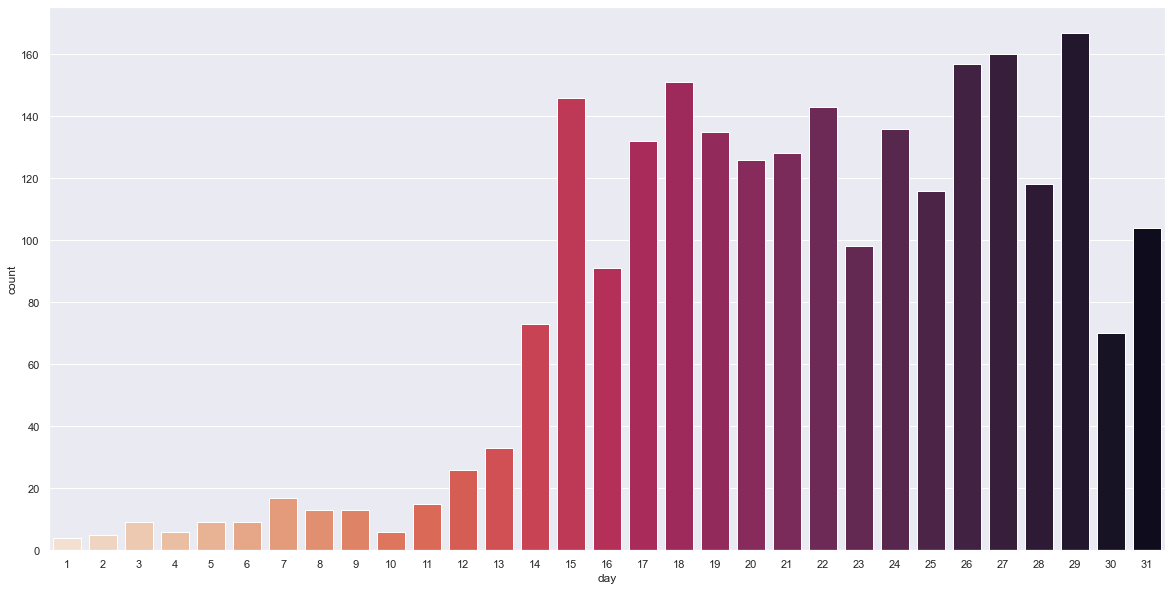

In [26]:
# seaborn의 countplot함수를 사용하여 그래프로 출력합니다.
plt.figure(figsize=(20,10))
sns.set(style="darkgrid")
ax=sns.countplot(x="day",data=corona_del_col[corona_del_col['month']=='8'],palette="rocket_r",order=order_day)
# corona_del_col 데이터에서 month가 8인 데이터만 불러옵니다.

#### 퀴즈 1. 8월 평균 일별 확진자 수를 구하세요. (8월 총 확진자/31일)

In [27]:
# 평균을 구하려면 전체 수에서 날짜만큼 나눠주면 됩니다.
# .count() : 전체 데이터의 개수를 구하는 함수
# .value_counts() : 날짜마다 데이터의 개수를 구하고 개수가 많은 순서대로 내림차순 정렬
# 평균을 구하는 두가지 방법
corona_del_col[corona_del_col['month']=='8']['day'].count()/31
corona_del_col[corona_del_col['month']=='8']['day'].value_counts().mean()

77.93548387096774

### 3.4. 지역별 확진자 수 출력
`지역` 데이터를 간단히 출력해보면 `00구` 형태의 문자열 데이터임을 알 수 있습니다.

In [28]:
# 지역단위로 구분을 해보겠습니다.
corona_del_col['지역']

0       양천구
1       강동구
2       강남구
3       관악구
4       관악구
       ... 
5743    성북구
5744    마포구
5745    종로구
5746    중랑구
5747    강서구
Name: 지역, Length: 5748, dtype: object

이번에는 지역별로 확진자가 얼마나 있는지 막대그래프로 출력해 보겠습니다.

In [29]:
# 글씨체 모듈  # 한국어를 못불러온다.
import matplotlib.font_manager as fm
font_dirs=['/usr/share/fonts/truetype/nanum', ]
font_files=fm.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    fm.fontManager.addfont(font_file)

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
C:\Users\yehjin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yehjin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yehjin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yehjin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yehjin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yehjin\anaconda3\lib\site-pa

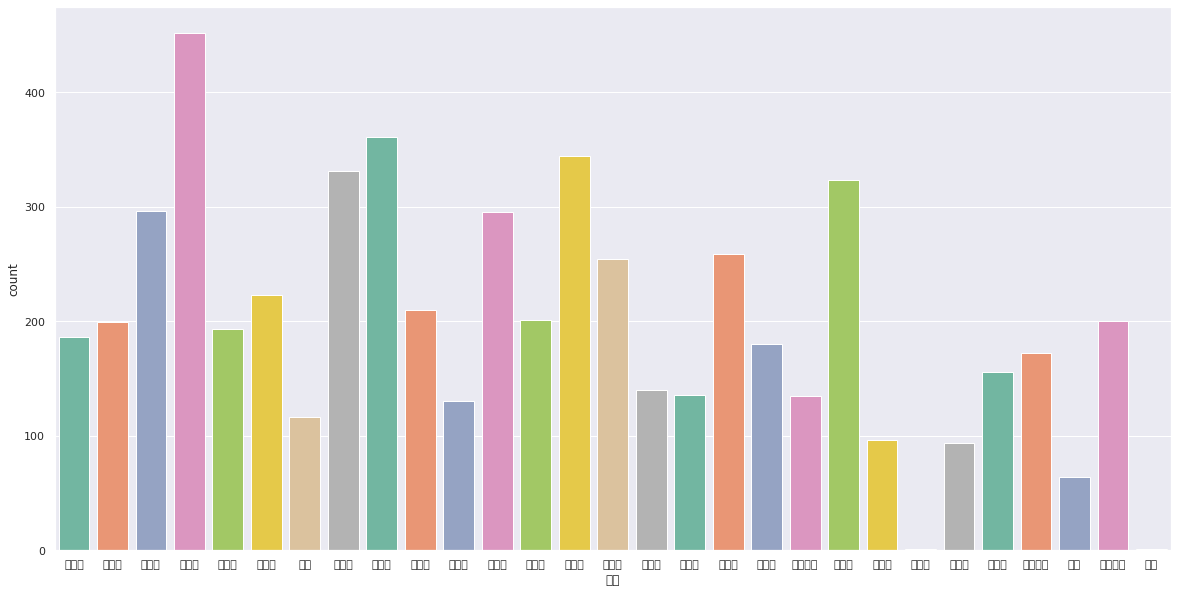

In [30]:
plt.figure(figsize=(20,10))
# 한글 출력을 위해서 폰트 옵션을 설정합니다.
sns.set(font="NanumBarunGothic",rc={"axes.unicode_minus":False},style='darkgrid') # False를 해주지않으면 마이너스기호가 깨져보입니다.
ax=sns.countplot(x="지역",data=corona_del_col,palette="Set2")

#### 지역 이상치 데이터 처리
위의 출력된 데이터를 보면 `종랑구`라는 잘못된 데이터와 `한국`이라는 지역과는 맞지않는 데이터가 있음을 알 수 있습니다.

기존 지역 데이터 특성에 맞도록 `종랑구`-> `중랑구`, `한국`-> `기타`로 데이터를 변경해 보겠습니다.

In [31]:
# 데이터 중 이상한 것들을 제거해보겠습니다.
# replace 함수 : 콜론앞에것을 뒤에 것으로 바꿔라
# 이상치가 처리된 데이터이기때문에 새로운 변수로 dataframe을 저장하겠습니다.
corona_out_region=corona_del_col.replace({'종랑구':'중랑구','한국':'기타'})

C:\Users\yehjin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yehjin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yehjin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yehjin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yehjin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yehjin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45224 missing 

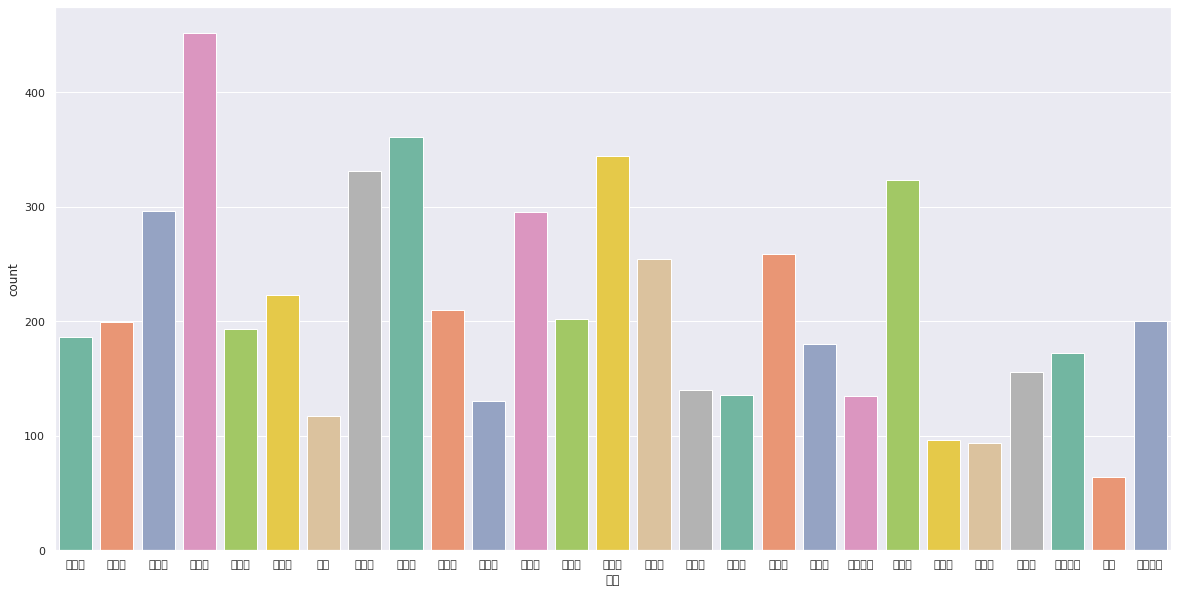

In [32]:
# 이상치가 처리된 데이터를 다시 출력해 보겠습니다.
plt.figure(figsize=(20,10))
sns.set(font="NanumBarunGothic",rc={"axes.unicode_minus":False},style='darkgrid')
ax=sns.countplot(x="지역",data=corona_out_region,palette="Set2")

### 3.5. 8월달 지역별 확진자 수 출력
감염자가 많았던 8월에는 지역별로 확진자가 어떻게 분포되어 있는지 막대그래프로 출력해 봅시다.

In [33]:
# 논리연산을 이용한 조건을 다음과 같이 사용하면 해당 조건에 맞는 데이터를 출력할 수 있습니다.
# 이상치를 제거한 데이터중 8월달만 보겠습니다.
#corona_out_region[corona_del_col['month']=='8']
corona_out_region[corona_out_region['month']=='8'] # 이 코드는 이해가 되는데 위에꺼는 이해가 안된다.
# 모든 데이터에서 빈 열은 지우고 month와 day열을 추가한 corona_del_col데이터 중에 month가 8인 데이터 만을 corona_out_region중에 골르라는 뜻입니다.

,연번,확진일,환자번호,지역,여행력,접촉력,상태,이동경로,등록일,수정일,노출여부,month,day
1271,4477,8.31.,20132,타시도,NaN,감염경로 조사중,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y,8,31
1272,4476,8.25.,17968,타시도,NaN,성북구 사랑제일교회 관련,NaN,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y,8,25
1273,4475,8.26.,18821,타시도,NaN,타시도 확진자 접촉,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y,8,26
1274,4474,8.27.,18818,타시도,NaN,기타 확진자 접촉,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y,8,27
1504,4244,8.30.,20116,타시도,NaN,감염경로 조사중,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y,8,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4140,1608,8.2.,14382,용산구,일본,해외 접촉 추정,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y,8,2
4141,1607,8.1.,14364,양천구,NaN,송파구 확진자 접촉,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y,8,1
4142,1606,8.1.,14362,종로구,NaN,종로구 지인모임 신명투자,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y,8,1
4144,1604,8.1.,14366,강서구,NaN,강서구 요양시설관련,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y,8,1


C:\Users\yehjin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yehjin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yehjin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yehjin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yehjin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yehjin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44396 missing 

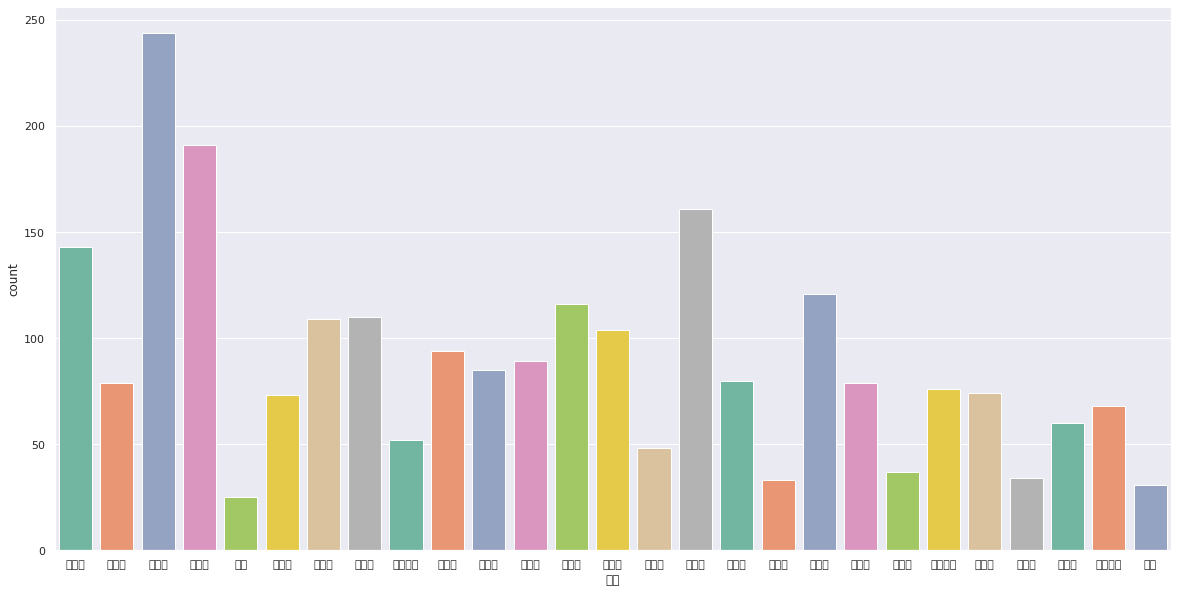

In [34]:
# 8월달 확진자수를 지역별 그래프로 출력해 보겠습니다.
plt.figure(figsize=(20,10))
sns.set(font="NanumBarunGothic",rc={"axes.unicode_minus":False},style='darkgrid')
ax=sns.countplot(x="지역",data=corona_out_region[corona_del_col['month']=='8'],palette="Set2")
# 큰따옴표랑 작은따옴표 구분해야되나?

### 3.6. 월별 관악구 확진자 수 출력
이번에는 확진자가 가장 많았던 관악구 내의 확진자 수가 월별로 어떻게 증가했는지 그 분포를 막대그래프로 출력해보겠습니다.

In [35]:
# 해당 column을 지정하여 series형태(index,values)로 출력할 수 있습니다.
corona_out_region['month'][corona_out_region['지역']=='관악구']
# 지역이 관악구인 곳의 month만 출력

3       10
4       10
6       10
7       10
8       10
        ..
5630     3
5661     2
5674     2
5695     2
5711     2
Name: month, Length: 452, dtype: object

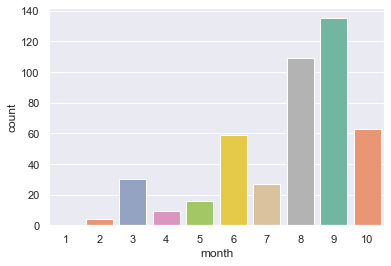

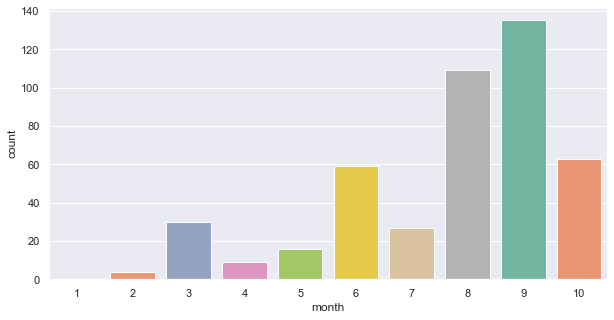

In [36]:
# 그래프로 출력해보겠습니다.
# 1. 그래프의 크기를 지정해 주지않고 그렸을 때
sns.set(style="darkgrid")
ax_1=sns.countplot(x="month",data=corona_out_region[corona_out_region['지역']=='관악구'], palette="Set2",order=order_month)

# 2. 그래프의 크기를 지정해 주고 그렸을 때
plt.figure(figsize=(10,5))  
sns.set(style="darkgrid")
# 그래프 그리기
ax_2=sns.countplot(x="month",data=corona_out_region[corona_out_region['지역']=='관악구'], palette="Set2",order=order_month)

### 3.7. 서울 지역에서의 확진자를 지도에 출력
지도를 출력하기위한 라이브러리로 folium을 사용해 보겠습니다.

In [37]:
# folium : 지도출력 라이브러리
import folium
# folium모듈에 있는 Map함수를 이용
# Map : [위도,경도]를 이용하여 지도를 출력
# zoom_start : 전체 지도에서 zoom을 얼마나한것을 초기화면으로 할 것인가. 값이 크면클수록 zoom이 많이된 지도입니다.
map_osm=folium.Map(location=[37.529622, 126.984307],zoom_start=11)
map_osm

지역마다 지도에 정보를 출력하기 위해서는 각 지역의 좌표정보가 필요합니다.

이를 해결하기위헤서 서울시 행정구역 시군 정보 데이터를 불러와 사용하겠습니다.

데이터 출처: https://data.seoul.go.kr/dataList/OA-11677/S/1/datasetView.do

In [38]:
# CRS에 저장하겠습니다.
CRS=pd.read_csv("./data/서울시 행정구역 시군구 정보 (좌표계_ WGS1984).csv")
CRS  # 위도,경도 알아내기

,순번,시군구코드,시군구명_한글,시군구명_영문,ESRI_PK,위도,경도
0,1,11320,도봉구,Dobong-gu,0,37.665861,127.031767
1,2,11380,은평구,Eunpyeong-gu,1,37.617612,126.922700
2,3,11230,동대문구,Dongdaemun-gu,2,37.583801,127.050700
3,4,11590,동작구,Dongjak-gu,3,37.496504,126.944307
4,5,11545,금천구,Geumcheon-gu,4,37.460097,126.900155
5,6,11530,구로구,Guro-gu,5,37.495486,126.858121
6,7,11110,종로구,Jongno-gu,6,37.599100,126.986149
7,8,11305,강북구,Gangbuk-gu,7,37.646995,127.014716
8,9,11260,중랑구,Jungnang-gu,8,37.595379,127.093967
9,10,11680,강남구,Gangnam-gu,9,37.495985,127.066409


저장된 데이터에서 지역명이 서울의 중심지인 `중구`의 데이터를 뽑아보겠습니다.

In [39]:
CRS[CRS['시군구명_한글']=='중구']

,순번,시군구코드,시군구명_한글,시군구명_영문,ESRI_PK,위도,경도
11,12,11140,중구,Jung-gu,11,37.557945,126.99419


이제 for문을 사용하여 지역마다 확진자를 원형 마커를 사용하여 지도에 출력해 보겠습니다.

In [48]:
# corona_out_region의 지역에서는 '00구' 이외에 '타시도','기타'에 해당되는 데이터가 존재합니다.
# '타시도'와 '기타'는 위도, 경도를 찾을수 없기때문에 삭제하고 새로운 변수 corona_seoul로 저장합니다.
# drop : 데이터 삭제
# .index를 왜 붙어야할까?
corona_seoul=corona_out_region.drop(corona_out_region[corona_out_region['지역']=='타시도'].index)
corona_seoul=corona_seoul.drop(corona_out_region[corona_out_region['지역']=='기타'].index)

# 서울 중심지 중구를 가우데 좌표로 잡아서 지도를 출력하겠습니다.
map_osm=folium.Map(location=[37.557945, 126.99419],zoom_start=11)

# 지역 정보를 set함수를 사용하여 25개의 지역을 뽑겠습니다.
for region in set(corona_seoul['지역']):
    # 해당 지역의 데이터 개수를 count에 저장합니다.
    # region과 지역이 일치하는 개수를 셉니다.
    count=len(corona_seoul[corona_seoul['지역']==region])
    # 해당 지역의 데이터를 CRS에서 뽑아냅니다.
    CRS_region=CRS[CRS['시군구명_한글']==region]
    
    # CircleMarker를 사용하여 지역마다 원형마커를 생성합니다.
    marker=folium.CircleMarker([CRS_region['위도'],CRS_region['경도']], #위치
                              radius=count/10+10,  # 원크기
                              color='#3186cc',  # 원의 선 색
                              fill_color='#3186cc',  # 원의 내부 색
                              popup=' '.join((region,str(count),'명')))  # 팝업 설정
    
    # 생성한 원형마커를 지도에 추가합니다.
    marker.add_to(map_osm)
map_osm
# 원을 클릭하면 확진자 수를 확인할 수 있습니다.

#### 퀴즈 2. 6월에 확진자가 가장 많이 나온 지역을 구하세요.

In [56]:
# value_count의 default : 내림차순
top=corona_out_region[corona_del_col['month']=='6']['지역'].value_counts()
top.index[0]  # 제일 많은 지역 구하기

'관악구'

출처 : "2021 AI 온라인 실무 기본/응용 교육과정